<a href="https://colab.research.google.com/github/encoder43/Calorie_burn_predictor/blob/main/Calorie_burn_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARIES

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
# set randomseed
rng = np.random.default_rng(seed=42)

In [2]:
from google.colab import auth
from pandas.io.parsers.readers import read_csv

# **Data collection and processing**

In [3]:
# loading the data from csv file to a Pandas DataFrame
dataframe_cal= pd.read_csv('/content/drive/MyDrive/data/calories.csv')

In [4]:
dataframe_cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
dataframe_exe=pd.read_csv('/content/drive/MyDrive/data/exercise.csv')

In [6]:
dataframe_exe.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the Two data sets

In [7]:
dataframe=pd.concat([dataframe_exe,dataframe_cal['Calories']],axis=1)

In [8]:
dataframe.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# **`Data analysis`**

In [9]:
print(type(dataframe.shape),dataframe.shape)


<class 'tuple'> (15000, 9)


In [10]:
dataframe.info

<bound method DataFrame.info of         User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5

In [11]:
dataframe.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [12]:
print(type(dataframe.isnull().sum()),dataframe.isnull().sum())

<class 'pandas.core.series.Series'> User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


# **Data Visualisation**

In [13]:
dataframe.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8c97f117d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8c97f11ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8c97f111d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8c97f1ad50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8c97f1a590>,
 'means': []}

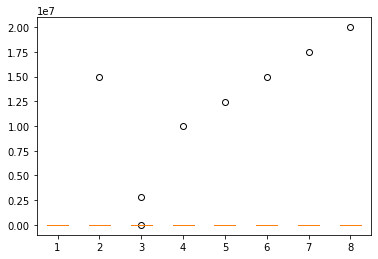

In [14]:
plt.boxplot(dataframe.describe())

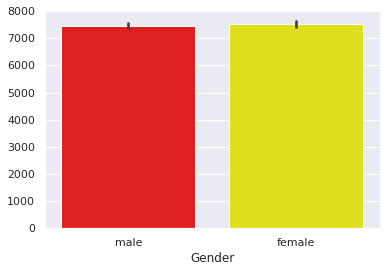

In [15]:
sns.set()
plt.figure()
df=sns.barplot(data=dataframe,y=dataframe.index, x="Gender", palette=[ 'red', 'yellow'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


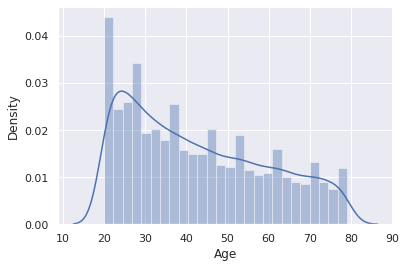

In [16]:
sns.distplot(dataframe['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

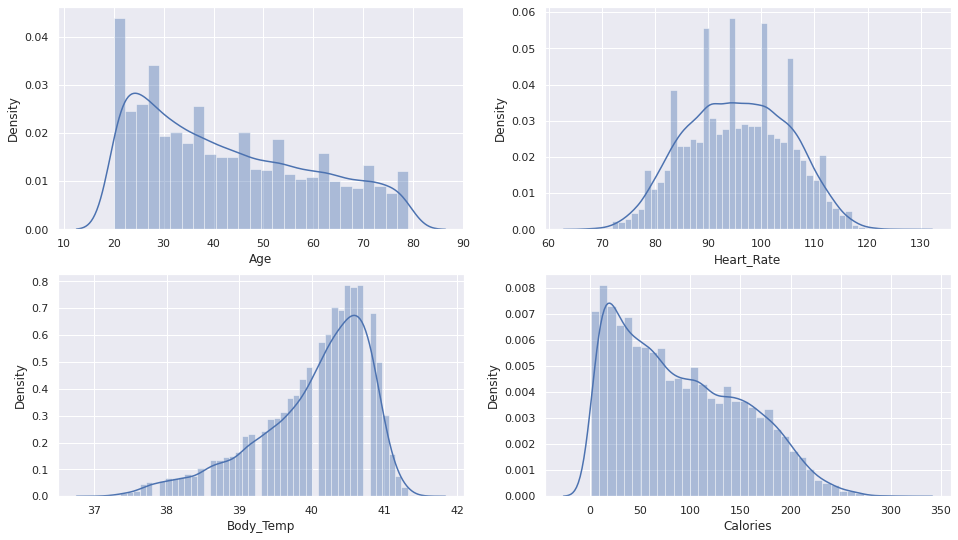

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.distplot(dataframe['Age'], ax=axes[0, 0])
sns.distplot(dataframe['Heart_Rate'],ax=axes[0, 1])
sns.distplot(dataframe['Body_Temp'],ax=axes[1, 0])
sns.distplot(dataframe['Calories'],ax=axes[1, 1])

plt.show()

# **DATA CORELATION**

The data points are said to be positively co related if they are directly proportional to each other.
The data points are said to be negitively co related if they are in
directly proportional to each other.

In [18]:
dataframe1=dataframe.drop(columns=['User_ID'],axis=1)
relation=dataframe1.corr()

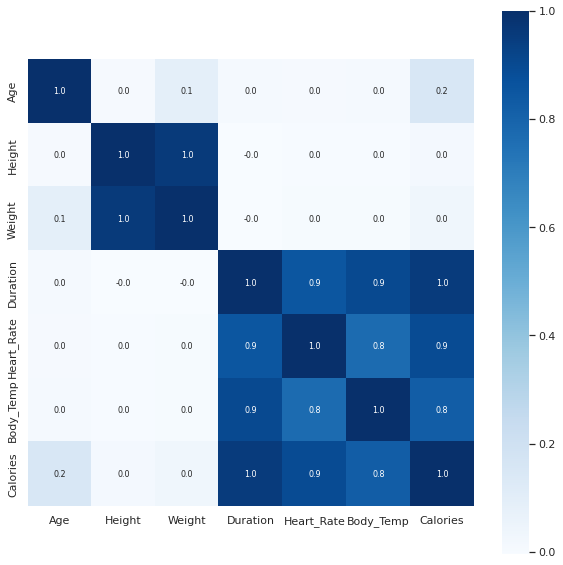

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(relation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# WE SHOULD CONVERT THE TEXT DATA TO NUMERICAL DATA

In [20]:
dataframe.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [21]:
dataframe.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


# **Adjusting the axis**

In [22]:
X = dataframe.drop(columns=['User_ID','Calories'], axis=1)
Y = dataframe['Calories']

In [23]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [24]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

# **TEST TRAIN USING FUNCTIONS**

NN-NEAREST NEIGHBOUR

In [26]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

In [27]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments
  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

In [28]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [29]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

# **TEST TRAIN SPLIT**using sklearn

> Indented block



In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


(3000,)

# **Training Regression model**

In [54]:
# loading the model
model = XGBRegressor()

In [55]:
model.fit(X_train,Y_train)

[17:11:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

# **Testing Regression model**

In [56]:
train_data_prediction =model.predict(X_train)

In [57]:
train_data_prediction

array([  9.806499,  35.532837,  28.32333 , ..., 102.74845 , 179.59464 ,
        44.3327  ], dtype=float32)

In [58]:
Y_pred =model.predict(X_test)

In [59]:
Y_test

7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64

In [60]:
Y_pred

array([129.06204 , 223.79721 ,  39.181965, ..., 145.59767 ,  22.53474 ,
        92.29064 ], dtype=float32)

# **Evaluation**

R Square is calculated by the sum of squared of prediction error divided by the total sum of the square which replaces the calculated prediction with mean. R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

In [64]:
metrics.r2_score(Y_test, Y_pred,  sample_weight=None, multioutput='uniform_average')

0.9963065655529431

Mean Square Error(MSE)/Root Mean Square Error(RMSE)
While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness for the fit.MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points.

In [65]:
metrics.mean_squared_error(Y_test, Y_pred, sample_weight=None, multioutput='uniform_average', squared=True)

14.506464988228966

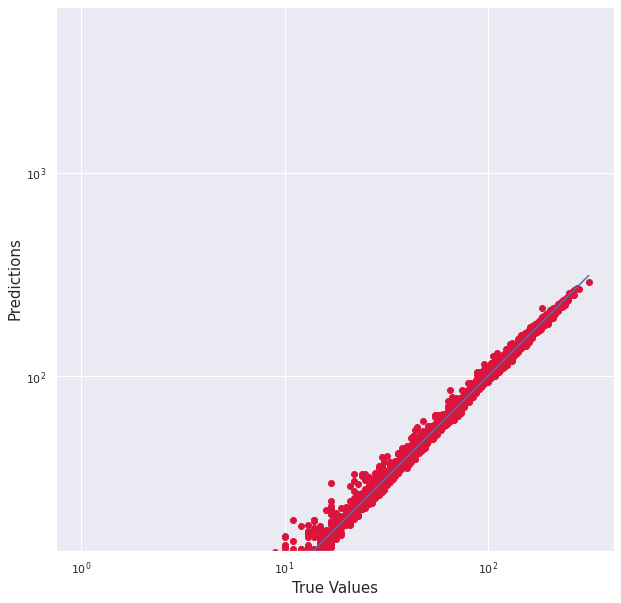

In [73]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c=['crimson'])
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [79]:
Y_pred.shape

(3000,)

In [78]:
Y_test.shape

(3000,)

In [77]:
X_test.shape

(3000, 7)